# Project title

Joshua Vilela, Tristan Chen, Matthew Xu.

#### Author contributions

1. Joshua Vilela: Studied the data documentation and wrote the data description.
2. Tristan Chen: Tidying the dataset and plots
3. Matthew Xu: Wrote project descriptions and construct jypter notebook

#### Abstract

Prepare an abstract *after* you've written the entire report. The abstract should be 4-6 sentences summarizing the report contents. Typically:
* the first 1-2 sentences introduce and motivate the topic;
* the next 1-2 sentences state the aims;
* the next 1-2 sentences state the findings.ct Plan Report# Project title

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

---
## 0. Background: Diabetes

Diabetes has become one of the most common life threatening diseases affecting almost 422 million people across the globe. This disease also has a long asymptomatic phase which makes it very difficult to detect as 50% of people suffering diabetes do not know they have it because of this fact. Early detection of diabetes is very crucial for this disease which is why people accept data mining classification methods in order to create a model to predict the risk of someone having diabetes. This is where gathering data from diabetic or could be diabetic patients come into play as this data allows the model to evaluate the risk with more precision. This is the main reason this dataset was created as they wanted to predict how likely the patient has diabetes and allow them to treat it earlier.

<center><img src='diabetes_.png' style='width:300px'></center>

The data are publicly available on the UCI data repository: 
> Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

### 1. Aims




## Materials and methods

The goal of this section is to describe your dataset(s) and sketch out your analysis.

### Datasets

In [2]:
# import diabetes data
diabetes_raw = pd.read_csv('diabetes_data_upload.csv')
diabetes_raw.head(n=5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Binary Datasets

In [3]:
# change yes/no to binary 0/1 for anaylsis
diabetes_yn = diabetes_raw.replace(to_replace=['No', 'Yes'], value=[0, 1])

#change gender Male/Female to 0/1 for analysis
diabetes_gender = diabetes_yn.replace(to_replace=['Male', 'Female'], value=[0, 1])

# change label postive/Negative to 0/1 for anaylsis
diabetes_final = diabetes_gender.replace(to_replace=['Negative', 'Positive'], value=[0, 1])

diabetes_final.head(n=5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Variable Correlation

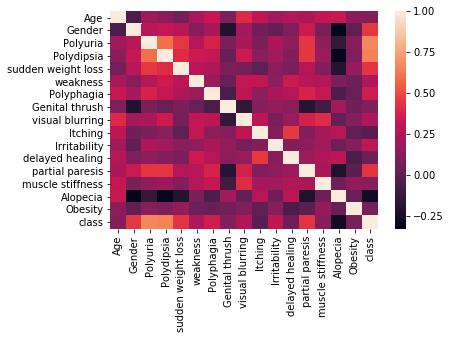

In [4]:
# find correlation values
corr = diabetes_final.corr()

# heatmap to show correlation values between variables
# class is true values
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

### Splitting Data to Training/Test Sets

In [5]:
from sklearn.model_selection import train_test_split

X = diabetes_final.loc[:, diabetes_final.columns != 'class']
y = diabetes_final.loc[:, diabetes_final.columns == 'class']

# using 30% test ize, data set isnt large
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression

In [6]:
lr = LogisticRegression()

lr.fit(X_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred = lr.predict(X_test)

### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[56  6]
 [ 4 90]]


### Classifcation Report

In [9]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.94      0.96      0.95        94

    accuracy                           0.94       156
   macro avg       0.94      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



### Accuracy Score

In [10]:
score = lr.score(X_test, y_test)
print(f"Mean Accuracy Score: {score}")

Mean Accuracy Score: 0.9358974358974359


### Coefficients

In [11]:
columns = pd.Series(diabetes_final.columns)
coef = pd.Series(np.ravel(lr.coef_))

df_coeff = pd.concat([columns,coef], axis = 1)
df_coeff

,0,1
0,Age,-0.029355
1,Gender,2.600933
2,Polyuria,2.589485
3,Polydipsia,2.752740
4,sudden weight loss,0.572163
5,weakness,0.350271
6,Polyphagia,0.562261
7,Genital thrush,1.091966
8,visual blurring,0.121674
9,Itching,-1.066799


### Precision Recall Plot

(0, 1)

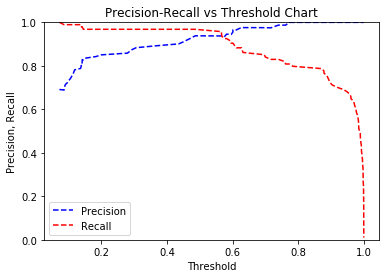

In [12]:
#Look at precision vs. recall at various thresholds
probs_y = lr.predict(X_test)
probs_y=lr.predict_proba(X_test) 

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:,1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

### ROC Curve

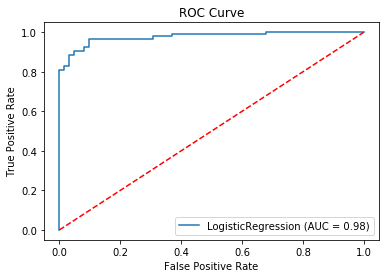

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
plot_roc_curve(lr, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.show()